In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats

In [2]:
#Versions
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("seaborn",sns.__version__)
print("sklearn",sklearn.__version__)

numpy 2.0.0
pandas 2.2.2
seaborn 0.13.2
sklearn 1.5.1


In [10]:
db=pd.read_csv("Heart4.csv")

In [11]:
db

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,Slope,CA,Thal,Output
0,58,0,2,155,152,1,0,164,0,1.720641,1,3,1,4
1,72,1,3,109,247,1,0,93,0,0.390026,0,1,3,2
2,43,1,3,198,311,0,0,155,1,2.332381,0,3,1,4
3,64,0,1,98,247,0,0,127,0,5.250067,0,2,3,2
4,59,0,2,109,339,1,0,101,1,4.464690,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,42,1,3,109,328,1,1,188,0,5.123620,0,0,3,1
3496,31,0,1,199,217,1,0,141,0,0.111780,0,0,2,2
3497,48,0,3,182,275,1,1,81,1,6.101355,1,1,3,3
3498,63,0,1,130,245,0,1,158,1,4.497024,1,0,2,3


In [12]:
db.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,Slope,CA,Thal,Output
0,58,0,2,155,152,1,0,164,0,1.720641,1,3,1,4
1,72,1,3,109,247,1,0,93,0,0.390026,0,1,3,2
2,43,1,3,198,311,0,0,155,1,2.332381,0,3,1,4
3,64,0,1,98,247,0,0,127,0,5.250067,0,2,3,2
4,59,0,2,109,339,1,0,101,1,4.464690,1,2,3,0


In [13]:
db.tail()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,Slope,CA,Thal,Output
3495,42,1,3,109,328,1,1,188,0,5.123620,0,0,3,1
3496,31,0,1,199,217,1,0,141,0,0.111780,0,0,2,2
3497,48,0,3,182,275,1,1,81,1,6.101355,1,1,3,3
3498,63,0,1,130,245,0,1,158,1,4.497024,1,0,2,3
3499,50,1,2,196,296,0,0,162,0,1.489519,0,0,3,3


In [14]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3500 non-null   int64  
 1   Gender          3500 non-null   int64  
 2   ChestPainType   3500 non-null   int64  
 3   RestingBP       3500 non-null   int64  
 4   Cholesterol     3500 non-null   int64  
 5   FastingBS       3500 non-null   int64  
 6   RestECG         3500 non-null   int64  
 7   MaxHR           3500 non-null   int64  
 8   ExerciseAngina  3500 non-null   int64  
 9   Oldpeak         3500 non-null   float64
 10  Slope           3500 non-null   int64  
 11  CA              3500 non-null   int64  
 12  Thal            3500 non-null   int64  
 13  Output          3500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 382.9 KB


In [15]:
db.describe()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,Slope,CA,Thal,Output
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,54.670000,0.465429,2.007143,144.335143,250.546286,0.500571,0.519429,130.955429,0.540286,3.082409,0.513143,1.465429,1.958857,2.091429
std,14.637331,0.498875,0.811256,31.402029,57.024534,0.500071,0.499694,40.252025,0.498446,1.809077,0.499899,1.113047,0.845288,1.405369
min,29.000000,0.000000,1.000000,90.000000,150.000000,0.000000,0.000000,60.000000,0.000000,0.024294,0.000000,0.000000,1.000000,0.000000
25%,43.000000,0.000000,1.000000,119.000000,203.000000,0.000000,0.000000,94.000000,0.000000,1.480261,0.000000,0.000000,1.000000,1.000000
50%,55.000000,0.000000,2.000000,142.000000,251.500000,1.000000,1.000000,136.000000,1.000000,3.119967,1.000000,1.000000,2.000000,2.000000
75%,67.000000,1.000000,3.000000,172.000000,303.000000,1.000000,1.000000,166.000000,1.000000,4.663749,1.000000,2.000000,3.000000,3.000000
max,79.000000,1.000000,3.000000,199.000000,349.000000,1.000000,1.000000,201.000000,1.000000,6.196656,1.000000,3.000000,3.000000,4.000000


In [16]:
db.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Slope',
       'CA', 'Thal', 'Output'],
      dtype='object')

In [17]:
db.shape

(3500, 14)

In [18]:
db.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestECG           0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
Slope             0
CA                0
Thal              0
Output            0
dtype: int64

C:\Users\Dilip Nandiwale\AppData\Local\Temp\ipykernel_17988\3943790173.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='MaxHR', data=heart_data, palette='pastel', ax=axes[1, 0])
C:\Users\Dilip Nandiwale\AppData\Local\Temp\ipykernel_17988\3943790173.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Female', 'Male'])
C:\Users\Dilip Nandiwale\AppData\Local\Temp\ipykernel_17988\3943790173.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 1].set_xticklabels(['No', 'Yes'])


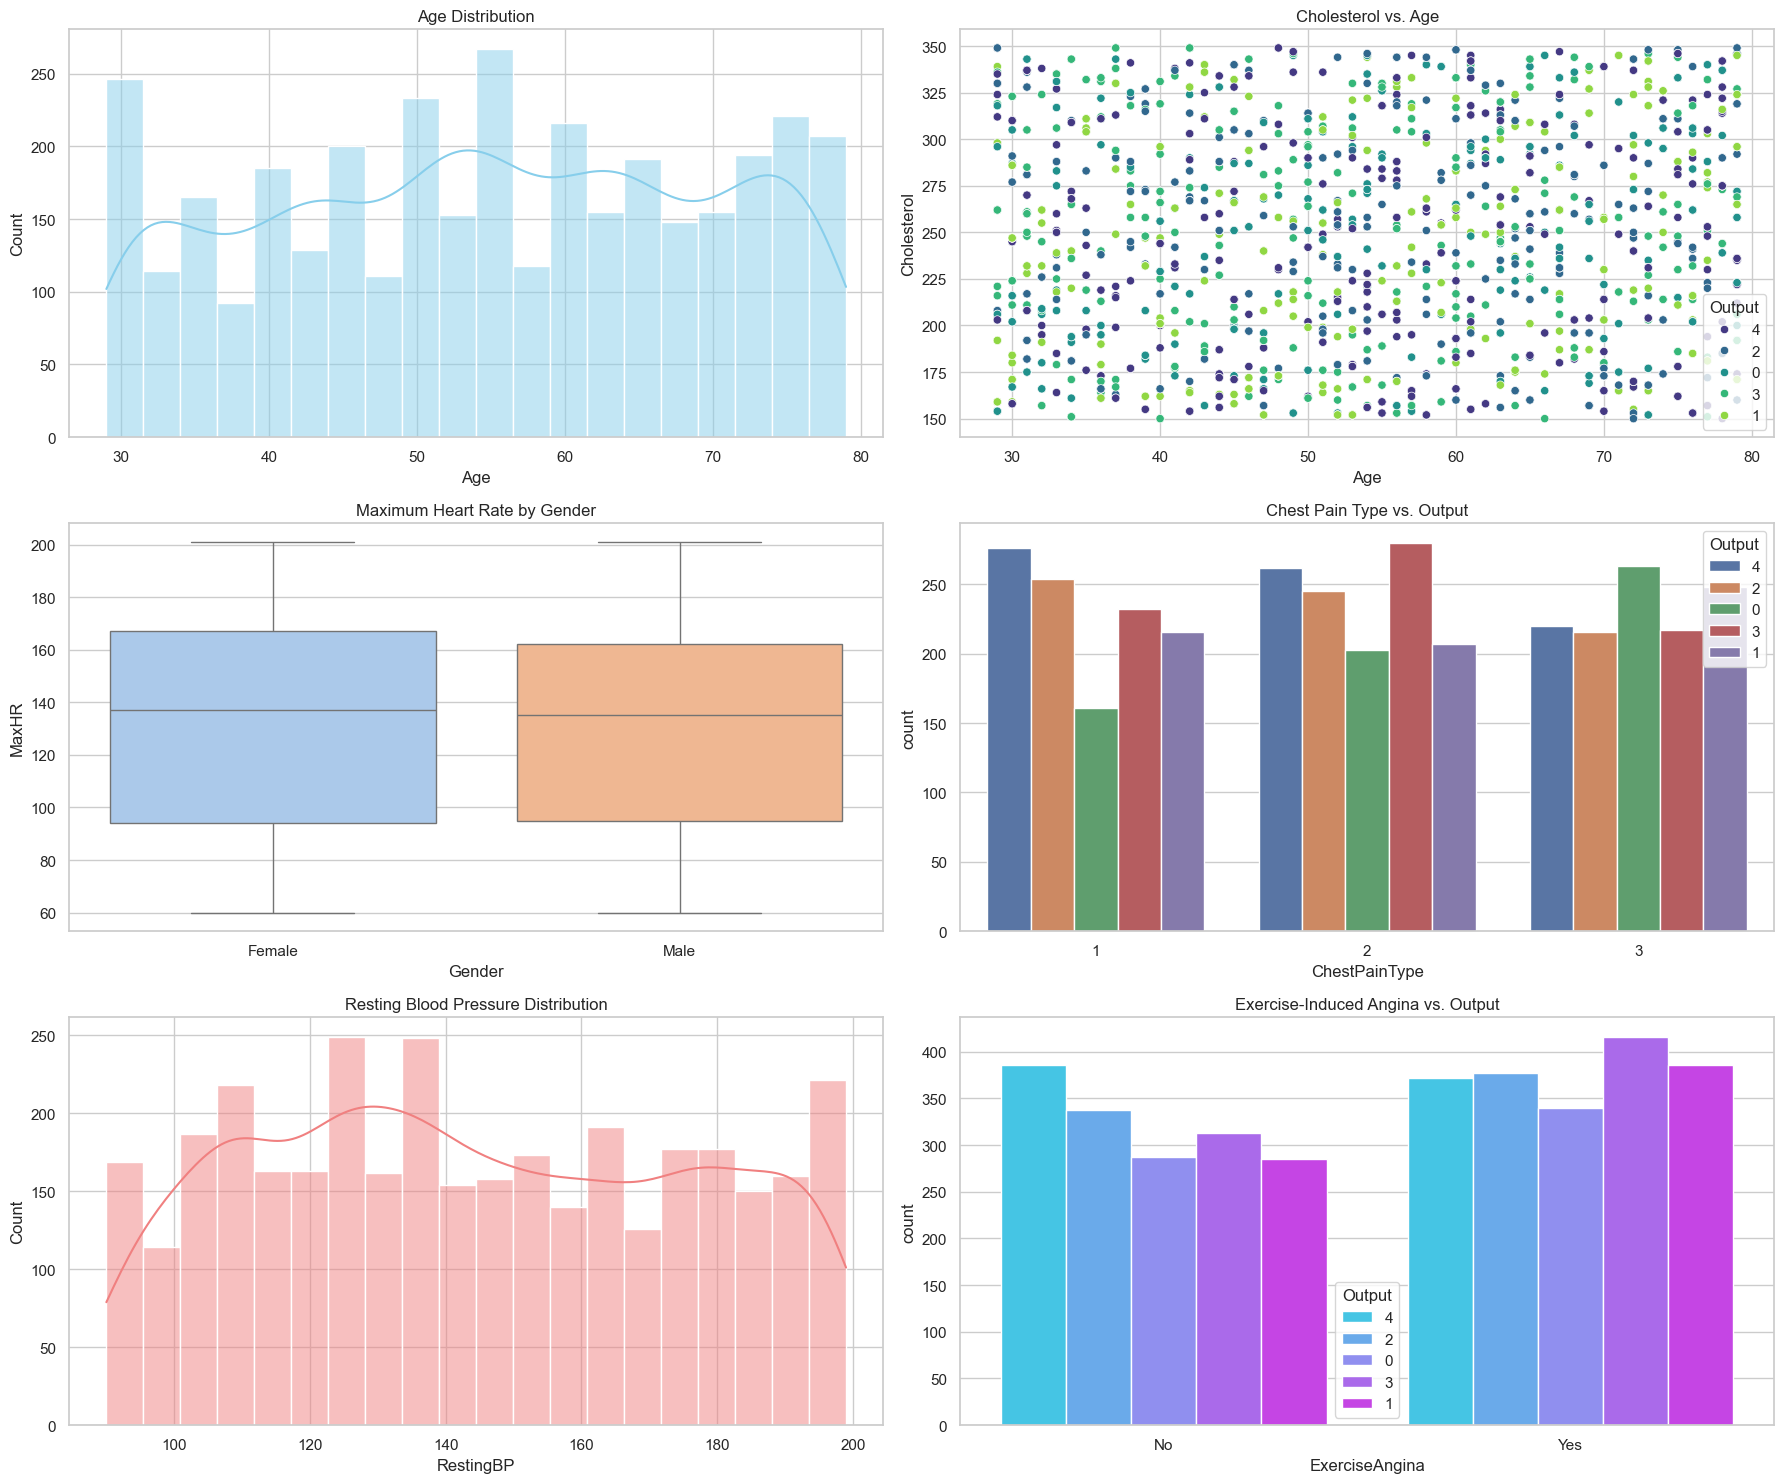

In [19]:
# Load the dataset
file_path = 'Heart4.csv'  # Replace with your file path
heart_data = pd.read_csv(file_path)

# Convert relevant columns to categorical
heart_data['ChestPainType'] = heart_data['ChestPainType'].astype('category')
heart_data['Output'] = heart_data['Output'].astype(str)  # Convert Output to string

# Set the style and palette
sns.set(style="whitegrid")

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Plot 1: Age Distribution
sns.histplot(heart_data['Age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

# Plot 2: Cholesterol vs. Age
sns.scatterplot(x='Age', y='Cholesterol', hue='Output', data=heart_data, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Cholesterol vs. Age')
# Plot 3: Maximum Heart Rate by Gender
sns.boxplot(x='Gender', y='MaxHR', data=heart_data, palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Maximum Heart Rate by Gender')
axes[1, 0].set_xticklabels(['Female', 'Male'])

# Plot 4: Chest Pain Type vs. Output
sns.countplot(x='ChestPainType', hue='Output', data=heart_data, palette='deep', ax=axes[1, 1])
axes[1, 1].set_title('Chest Pain Type vs. Output')

# Plot 5: Resting Blood Pressure Distribution
sns.histplot(heart_data['RestingBP'], bins=20, kde=True, ax=axes[2, 0], color='lightcoral')
axes[2, 0].set_title('Resting Blood Pressure Distribution')

# Plot 6: Exercise-Induced Angina vs. Output
sns.countplot(x='ExerciseAngina', hue='Output', data=heart_data, palette='cool', ax=axes[2, 1])
axes[2, 1].set_title('Exercise-Induced Angina vs. Output')
axes[2, 1].set_xticklabels(['No', 'Yes'])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
X = db.drop("Output", axis=1)
y = db["Output"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,Slope,CA,Thal
0,58,0,2,155,152,1,0,164,0,1.720641,1,3,1
1,72,1,3,109,247,1,0,93,0,0.390026,0,1,3
2,43,1,3,198,311,0,0,155,1,2.332381,0,3,1
3,64,0,1,98,247,0,0,127,0,5.250067,0,2,3
4,59,0,2,109,339,1,0,101,1,4.464690,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,42,1,3,109,328,1,1,188,0,5.123620,0,0,3
3496,31,0,1,199,217,1,0,141,0,0.111780,0,0,2
3497,48,0,3,182,275,1,1,81,1,6.101355,1,1,3
3498,63,0,1,130,245,0,1,158,1,4.497024,1,0,2


In [23]:
y

0       4
1       2
2       4
3       2
4       0
       ..
3495    1
3496    2
3497    3
3498    3
3499    3
Name: Output, Length: 3500, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

In [25]:
# Standardization (only for models that require it, like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Support Vector Machine
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression R^2:", r2_score(y_test, lr_pred))
# Ridge Regression
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge Regression R^2:", r2_score(y_test, ridge_pred))

# Lasso Regression
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso Regression R^2:", r2_score(y_test, lasso_pred))

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))



Random Forest Classifier Accuracy: 0.9142857142857143
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       189
           1       0.91      0.90      0.91       189
           2       0.92      0.89      0.91       219
           3       0.91      0.92      0.91       215
           4       0.89      0.92      0.91       238

    accuracy                           0.91      1050
   macro avg       0.92      0.91      0.91      1050
weighted avg       0.91      0.91      0.91      1050

Support Vector Machine Accuracy: 0.6466666666666666
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.61      0.64       189
           1       0.57      0.62      0.60       189
           2       0.68      0.71      0.69       219
           3       0.70      0.69      0.69       215
           4       0.63      0.60      0.61       238

    accuracy 

In [27]:
#Highest accuracy is for random forest tree regressor that is gives below 

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Classifier Accuracy: 0.9142857142857143
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       189
           1       0.91      0.90      0.91       189
           2       0.92      0.89      0.91       219
           3       0.91      0.92      0.91       215
           4       0.89      0.92      0.91       238

    accuracy                           0.91      1050
   macro avg       0.92      0.91      0.91      1050
weighted avg       0.91      0.91      0.91      1050



In [45]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Classifier Accuracy: 0.9142857142857143
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       189
           1       0.91      0.90      0.91       189
           2       0.92      0.89      0.91       219
           3       0.91      0.92      0.91       215
           4       0.89      0.92      0.91       238

    accuracy                           0.91      1050
   macro avg       0.92      0.91      0.91      1050
weighted avg       0.91      0.91      0.91      1050



In [41]:
import pickle
pickle.dump(dt_clf,open('one.pkl','wb'))
pickle.dump(scaler,open('two.pkl','wb'))

In [42]:

def predicion_system(Age,Gender,ChestPainType,RestingBP,Cholesterol,
       FastingBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,Slope,
       CA,Thal):
    features = [[Age,Gender,ChestPainType,RestingBP,Cholesterol,
       FastingBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,Slope,
       CA,Thal]]
    prediction =dt_clf.predict(features)
    
    return prediction[0]





In [44]:
Age=40
Gender=1
ChestPainType=1
RestingBP=196
Cholesterol=296
FastingBS=0
RestECG=1
MaxHR=105
ExerciseAngina=0
Oldpeak=1.489519
Slope=0
CA=0
Thal=3

prediction = predicion_system(Age,Gender,ChestPainType,RestingBP,Cholesterol,
       FastingBS,RestECG,MaxHR,ExerciseAngina,Oldpeak,Slope,
       CA,Thal)
print("Heart Disease Condition  is : ",prediction)

Heart Disease Condition  is :  0


c:\Users\Dilip Nandiwale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
